# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [117]:
# student 1:Sapir 8018

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [121]:
train_data= pd.read_csv('wine_train.csv')
train_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [125]:
test_data = pd.read_csv('wine_test.csv')
test_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [127]:
train_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [129]:
test_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.013889,2.488611,2.385556,19.791667,98.944444,2.212778,1.893889,0.421667,1.705278,5.168056,0.953056,2.504444,764.388889,1.000000
std,0.904962,1.210778,0.238716,3.308550,16.626905,0.569845,0.974970,0.134302,0.678846,2.637680,0.264303,0.676096,309.252950,0.792825
min,11.030000,0.990000,1.950000,14.000000,70.000000,1.350000,0.470000,0.200000,0.410000,1.740000,0.560000,1.270000,315.000000,0.000000
25%,12.320000,1.670000,2.207500,16.950000,89.000000,1.725000,0.897500,0.290000,1.297500,3.292500,0.722500,1.990000,520.000000,0.000000
50%,13.110000,1.900000,2.310000,20.000000,96.000000,2.250000,1.940000,0.425000,1.690000,4.475000,0.975000,2.600000,680.000000,1.000000
75%,13.757500,3.202500,2.560000,22.000000,102.250000,2.755000,2.765000,0.530000,2.042500,6.337500,1.092500,2.932500,1001.250000,2.000000
max,14.830000,5.800000,2.920000,28.500000,162.000000,3.100000,3.400000,0.660000,3.280000,13.000000,1.710000,3.920000,1510.000000,2.000000


In [131]:
##feature scaling for train set
train_data.describe().loc[['min', 'max']].T

,min,max
alcohol,11.41,14.75
malic_acid,0.74,5.65
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,78.00,151.00
total_phenols,0.98,3.88
flavanoids,0.34,5.08
nonflavanoid_phenols,0.13,0.63
proanthocyanins,0.42,3.58
color_intensity,1.28,11.75


In [133]:
##feature scaling for test set
test_data.describe().loc[['min', 'max']].T

,min,max
alcohol,11.03,14.83
malic_acid,0.99,5.80
ash,1.95,2.92
alcalinity_of_ash,14.00,28.50
magnesium,70.00,162.00
total_phenols,1.35,3.10
flavanoids,0.47,3.40
nonflavanoid_phenols,0.20,0.66
proanthocyanins,0.41,3.28
color_intensity,1.74,13.00


In [135]:
##check missing values in train data
print("Missing Values:")
print("train set:")
print(train_data.isnull().sum())
print("**************************")
##check missing values in test data
print("test set:")
print(test_data.isnull().sum())


Missing Values:
train set:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
**************************
test set:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
targe

In [137]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       36 non-null     float64
 1   malic_acid                    36 non-null     float64
 2   ash                           36 non-null     float64
 3   alcalinity_of_ash             36 non-null     float64
 4   magnesium                     36 non-null     float64
 5   total_phenols                 36 non-null     float64
 6   flavanoids                    36 non-null     float64
 7   nonflavanoid_phenols          36 non-null     float64
 8   proanthocyanins               36 non-null     float64
 9   color_intensity               36 non-null     float64
 10  hue                           36 non-null     float64
 11  od280/od315_of_diluted_wines  36 non-null     float64
 12  proline                       36 non-null     float64
 13  target 

In [27]:
###check the percentage representation of the classes in train data
train_data.target.value_counts(normalize=True).round(3)

target
1    0.401
0    0.338
2    0.261
Name: proportion, dtype: float64

In [29]:
###check the percentage representation of the classes in test data
test_data.target.value_counts(normalize=True).round(3)


target
1    0.389
2    0.306
0    0.306
Name: proportion, dtype: float64

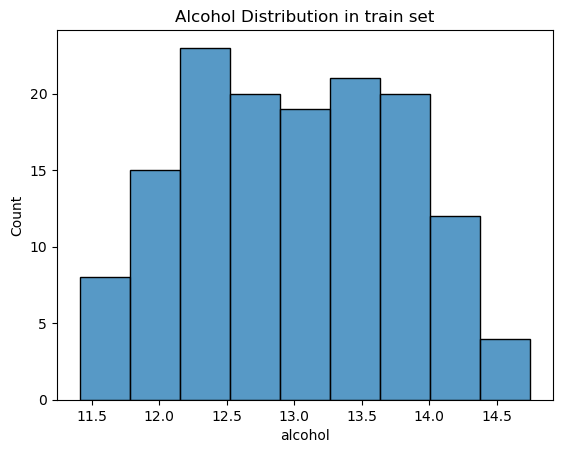

In [31]:
##vizulaition of alcohol distribution in train set
sns.histplot(train_data['alcohol'])
plt.title('Alcohol Distribution in train set')
plt.show()

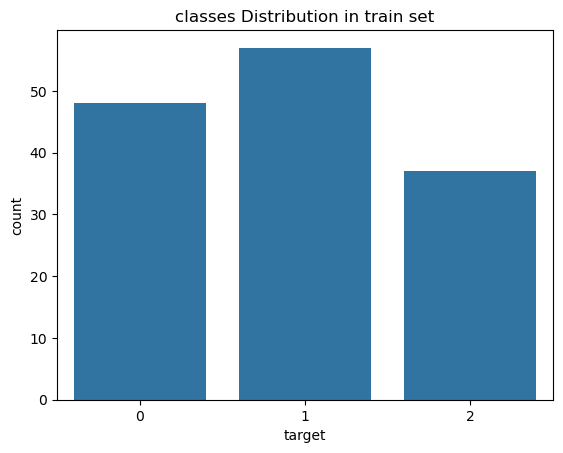

In [33]:
##vizulaition of classes distribution in train set
plt.figure()
sns.countplot(x='target', data = train_data)
plt.title('classes Distribution in train set')
plt.show()

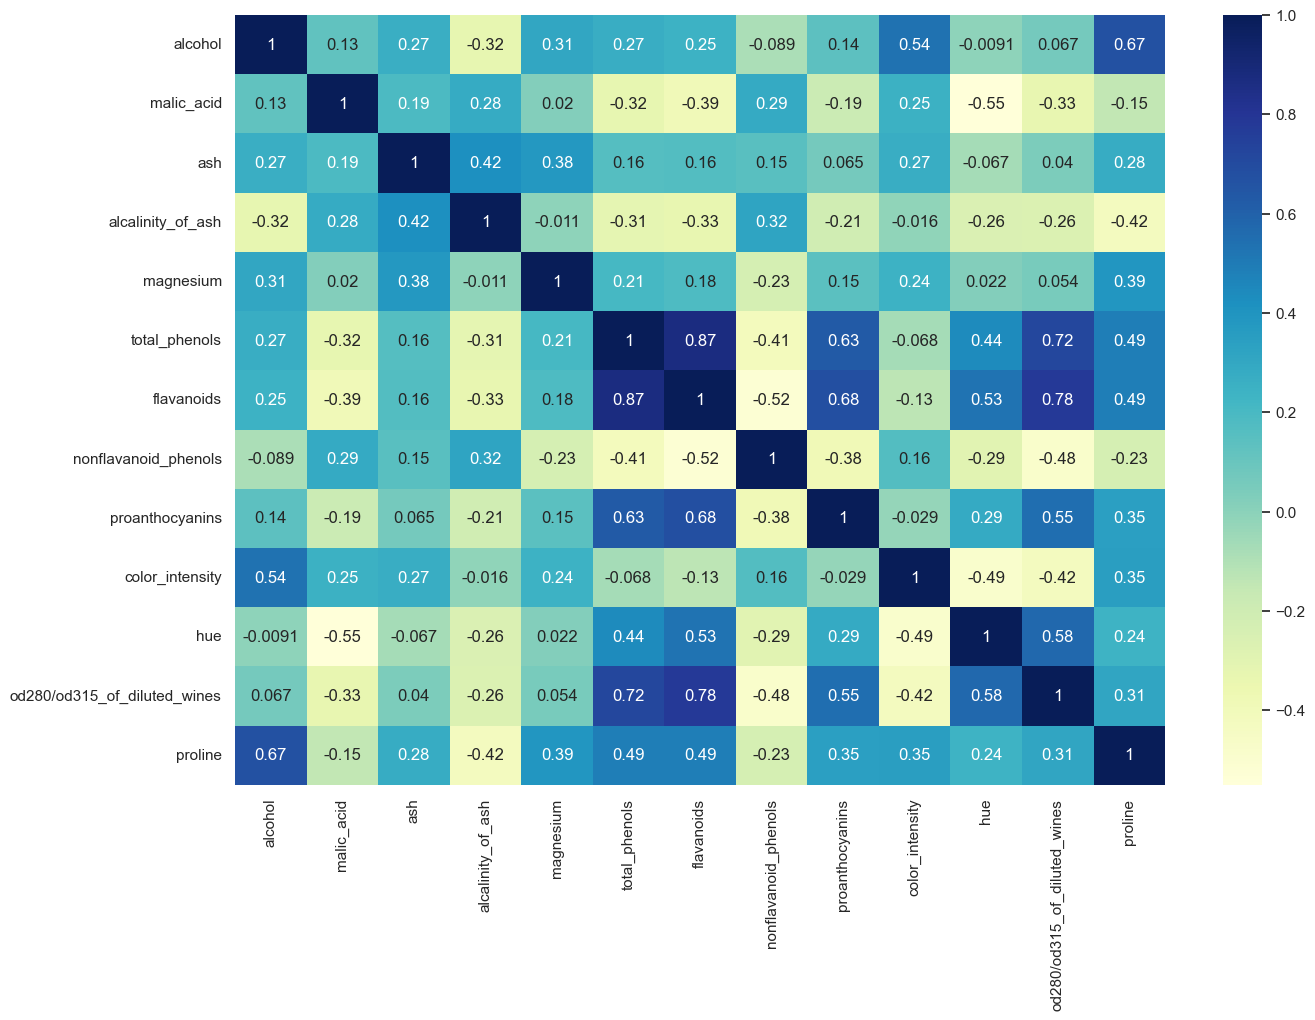

In [35]:
##heatmap of the linear correlations - correlation among features 

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(train_data.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

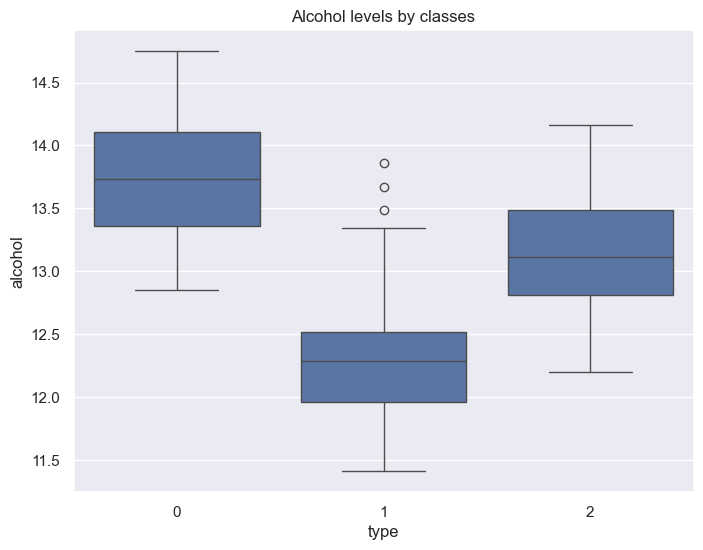

In [37]:
# Boxplot: Vizulaize alcohol distribution by wine classes train data
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='alcohol', data=train_data)
plt.title('Alcohol levels by classes')
plt.xlabel('type')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [233]:
#our database is allready divided to training set and testing set, so we only need to do fitting scaling:
scaler = StandardScaler() #standart scaler normalization (range (0,1))
X_train_scaled = scaler.fit_transform(train_data.drop('target', axis=1))#Fit scaler on train set and transform
X_test_scaled = scaler.transform(test_data.drop('target', axis=1))#transform test set-using same scaler as for train set
y_train = train_data['target']#separete target labels from the features for train set
y_test = test_data['target']#separete target labels from the features for test set

In [235]:
#Managing the experiments with cross validation
#Hyperparameters Tuning:note: pg = param grid
#1.Support Vector Machine (SVM). 
#C - regularization parameter. Kernel- Kernel type that will be used in this algo
svm_pg = {'C': [0.1, 1, 10, 100],'kernel': ['linear', 'rbf','poly']}
#2. RandomForestClassifier
#n_estimators- number of trees in the forest, max_depth-maximum depth of each tree
rf_pg = {'n_estimators': [50,100,150, 200, 250, 300],'max_depth': [None, 10, 20, 30]}
#3.KNeighborsClassifier
#n_neighbors- number of neighbors to use, metric- distance metric 
knn_pg = {'n_neighbors': [3, 5, 7, 9,11,13,15],'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev']}
#4. DecisionTreeClassifier
# criterion-function to measure the quality of a split, max_depth- maximum depth of the tree
#min_samples_split-minimum number of samples required to split an internal node
#min_samples_leaf - minimum number of samples required to be at a leaf node
dt_pg = {'criterion': ['gini', 'entropy'],'max_depth': [None, 10, 20, 30, 40],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [237]:
# Perform Grid Search with 5-fold Cross Validation
# Evaluate model performance using the f1_macro scoring
#SVM
svm = SVC()
gs_svm = GridSearchCV(svm, svm_pg, cv=5, scoring='f1_macro')
gs_svm.fit(X_train_scaled, y_train)
#RandomForestClassifier
rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, rf_pg, cv=5, scoring='f1_macro')
gs_rf.fit(X_train_scaled, y_train)
#KNeighborsClassifier
knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, knn_pg, cv=5, scoring='f1_macro')
gs_knn.fit(X_train_scaled, y_train)
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
gs_dt = GridSearchCV(dt, dt_pg, cv=5, scoring='f1_macro')
gs_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [238]:
#best parameters results 
print("Best parameters results:")
print("SVM:")
print(gs_svm.best_params_)
print("Random Forest:")
print(gs_rf.best_params_)
print("KNN:")
print(gs_knn.best_params_)
print("Decision Tree:")
print(gs_dt.best_params_)
print("*********************")
#best score results
print("Best F1-macro results:")
print("SVM:")
print(gs_svm.best_score_)
print("Random Forest:")
print(gs_rf.best_score_) 
print("KNN:")
print(gs_knn.best_score_)
print("Decision Tree:")
print(gs_dt.best_score_)

Best parameters results:
SVM:
{'C': 0.1, 'kernel': 'linear'}
Random Forest:
{'max_depth': 10, 'n_estimators': 50}
KNN:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Decision Tree:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
*********************
Best F1-macro results:
SVM:
0.9787114845938376
Random Forest:
0.9863203463203462
KNN:
0.9789682539682539
Decision Tree:
0.9519932183250261


In [241]:
# Create a summary table of the model results
results_initials = {
    'Model': [ 'SVM', 'Random Forest', 'KNN', 'Decision Tree'],
    'Best Params': [gs_svm.best_params_, gs_rf.best_params_, gs_knn.best_params_, gs_dt.best_params_],
    'Best F1-macro': [gs_svm.best_score_, gs_rf.best_score_, gs_knn.best_score_,gs_dt.best_score_]}
# display results in dataframe
results_df = pd.DataFrame(results_initials)

results_df



,Model,Best Params,Best F1-macro
0,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.978711
1,Random Forest,"{'max_depth': 10, 'n_estimators': 50}",0.986320
2,KNN,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.978968
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.951993


In [243]:
max_f1_macro = results_df['Best F1-macro'].idxmax()
max_row = results_df.loc[max_f1_macro]
print(f"Conclusion: From this table we can conclude that the best model is: {max_row['Model']}")

Conclusion: From this table we can conclude that the best model is: Random Forest


# feature Engineering

In [246]:
#Creating new features based on correlations seen above
train_fe = train_data.copy()#fe - training dataset copy for feature engineering 
test_fe = test_data.copy() #training dataset copy for feature engineering 

#features: 
# 1: total_phenols to flavanoids (ratio on Correlation Matrix: 0.87)
train_fe['total_phenols_ratio_flavanoids'] = train_fe['total_phenols'] / (train_fe['flavanoids'] + 1)
test_fe['total_phenols_ratio_flavanoids'] = test_fe['total_phenols'] / (test_fe['flavanoids'] + 1)

#2: od280/od315_of_diluted_wines to flavanoids(ratio on Correlation Matrix: 0.78)
train_fe['od_diluted_ratio_wines_flavanoids'] = train_fe['od280/od315_of_diluted_wines'] * train_fe['flavanoids']
test_fe['od_diluted_ratio_wines_flavanoids'] = test_fe['od280/od315_of_diluted_wines'] *test_fe['flavanoids']

# 3:alcohol to proline(ratio on Correlation Matrix: 0.67)
train_fe['alcohol_ratio_proline'] = train_fe['alcohol'] / (train_fe['proline'] + 1)
test_fe['alcohol_ratio_proline'] = test_fe['alcohol'] / (test_fe['proline'] + 1)

In [248]:
#display the correlated features in the end 
train_fe.iloc[:5, -3:]


,total_phenols_ratio_flavanoids,od_diluted_ratio_wines_flavanoids,alcohol_ratio_proline
0,0.640000,3.4050,0.025114
1,0.842391,1.5120,0.018083
2,1.261146,1.0374,0.023743
3,0.946970,4.0016,0.028413
4,0.967742,0.9240,0.015836


In [250]:
#first 5 rows of the modifed training dataset - correlated features in the end 
train_fe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,total_phenols_ratio_flavanoids,od_diluted_ratio_wines_flavanoids,alcohol_ratio_proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1,0.640000,3.4050,0.025114
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2,0.842391,1.5120,0.018083
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1,1.261146,1.0374,0.023743
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1,0.946970,4.0016,0.028413
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2,0.967742,0.9240,0.015836


# Grid Search with 5-fold Cross Validation

In [253]:
scaler = StandardScaler() #standart scaler normalization
X_scaled_train_data = scaler.fit_transform(train_fe.drop('target', axis=1))
X_scaled_train_data = scaler.transform(test_fe.drop('target', axis=1))
y_train = train_fe['target'] #save target lables
y_test = test_fe['target'] #save target lables

#abbrevation: gs- greed search fe-feature engineering 
#1.SVM 
svm_gs_fe = GridSearchCV(svm, svm_pg, cv=5, scoring='f1_macro')
svm_gs_fe.fit(X_train_scaled, y_train)
# 2.Random Forest
rf_gs_fe = GridSearchCV(rf, rf_pg, cv=5, scoring='f1_macro')
rf_gs_fe.fit(X_train_scaled, y_train)
# 3. KNN
knn_gs_fe = GridSearchCV(knn, knn_pg, cv=5, scoring='f1_macro')
knn_gs_fe.fit(X_train_scaled, y_train)
#4.Decision Tree
dt_gs_fe= GridSearchCV(dt, dt_pg, cv=5, scoring='f1_macro')
dt_gs_fe.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [254]:
#models result summery 
models_results = {
    'Model': ['SVM', 'Random Forest', 'KNN', 'Decision Tree'],
    'Best Params': [svm_gs_fe.best_params_, rf_gs_fe.best_params_, knn_gs_fe.best_params_,dt_gs_fe.best_params_],
    'Best F1-macro': [svm_gs_fe.best_score_,rf_gs_fe.best_score_,knn_gs_fe.best_score_,dt_gs_fe.best_score_]}

df_results_fe = pd.DataFrame(models_results)

In [255]:
print("Models results:")
df_results_fe

Models results:


,Model,Best Params,Best F1-macro
0,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.978711
1,Random Forest,"{'max_depth': 30, 'n_estimators': 50}",0.986320
2,KNN,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.978968
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.951819


In [259]:
max_f1_macro = df_results_fe['Best F1-macro'].idxmax()
max_row = df_results_fe.loc[max_f1_macro]
print(f"Conclusion: From this table we can conclude that the best model is: {max_row['Model']}")

Conclusion: From this table we can conclude that the best model is: Random Forest


# PCA:

In [262]:
scaler = StandardScaler()
X_scaled_train_data = scaler.fit_transform(train_data.drop('target', axis=1))
X_scaled_test_data = scaler.transform(test_data.drop('target', axis=1))

pca = PCA(n_components=5)  #Number of components can be adjusted
X_pca_train = pca.fit_transform(X_scaled_train_data)
X_pca_test = pca.transform(X_scaled_test_data)

In [264]:
# PCA dataframe:
pca_cols = [f'PC{i+1}' for i in range(X_pca_train.shape[1])]
X_train_pca_df = pd.DataFrame(X_pca_train, columns=pca_cols)
X_test_pca_df = pd.DataFrame(X_pca_test, columns=pca_cols)

# new features with original (without target)
X_train_final = pd.concat([X_train_pca_df, train_data[['target']]], axis=1)
X_test_final = pd.concat([X_test_pca_df, test_data[['target']]], axis=1)

In [ ]:
# Feature matrices and target vectors after PCA
X_scaled_train_data = X_train_final.drop('target', axis=1)
X_scaled_test_data = X_test_final.drop('target', axis=1)

# Keep the target variable separate
y_train = X_train_final['target']
y_test = X_test_final['target']

# Grid Search with 5-fold Cross Validation for SVM
gs_svm_pca = GridSearchCV(svm, svm_pg, cv=5, scoring='f1_macro')
gs_svm_pca.fit(X_scaled_train_data, y_train)

# Grid Search with 5-fold Cross Validation for Random Forest
gs_rf_pca = GridSearchCV(rf, rf_pg, cv=5, scoring='f1_macro')
gs_rf_pca.fit(X_scaled_train_data, y_train)

# Grid Search with 5-fold Cross Validation for KNN
gs_knn_pca = GridSearchCV(knn, knn_pg, cv=5, scoring='f1_macro')
gs_knn_pca.fit(X_scaled_train_data, y_train)

# Grid Search with 5-fold Cross Validation for Decision Tree
gs_dt_pca = GridSearchCV(dt,dt_pg, cv=5, scoring='f1_macro')
gs_dt_pca.fit(X_scaled_train_data, y_train)


In [ ]:
results_pca = {
    'Model': ['SVM','Random Forest', 'KNN', 'Decision Tree'],
    'Best Params': [ gs_svm_pca.best_params_,gs_rf_pca.best_params_,gs_knn_pca.best_params_,gs_dt_pca.best_params_ ],
    'Best F1-macro': [ gs_svm_pca.best_score_,gs_rf_pca.best_score_, gs_knn_pca.best_score_,gs_dt_pca.best_score_ ]}

results_pca = pd.DataFrame(results_pca)

In [ ]:
print("results with PCA")
results_pca

In [177]:
max_f1_macro = results_pca['Best F1-macro'].idxmax()
max_row = results_pca.loc[max_f1_macro]
print(f"Conclusion: From this table we can conclude that the best model is: {max_row['Model']}")

Conclusion: From this table we can conclude that the best model is: KNN


# compare all results:

In [183]:
df_combined = pd.concat([results_df, df_results_fe, results_pca], axis=0, keys=['Initial results', 'Feature Engineering', 'PCA'])

df_combined

Model  \
Initial results     0            SVM   
                    1  Random Forest   
                    2            KNN   
                    3  Decision Tree   
Feature Engineering 0            SVM   
                    1  Random Forest   
                    2            KNN   
                    3  Decision Tree   
PCA                 0            SVM   
                    1  Random Forest   
                    2            KNN   
                    3  Decision Tree   

                                                             Best Params  \
Initial results     0                     {'C': 0.1, 'kernel': 'linear'}   
                    1              {'max_depth': 20, 'n_estimators': 50}   
                    2  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...   
                    3  {'criterion': 'entropy', 'max_depth': 10, 'min...   
Feature Engineering 0                     {'C': 0.1, 'kernel': 'linear'}   
                    1             {'max_depth': 10, 'n_estimators': 100}   
                    2  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...   
                    3  {'criterion': 'entropy', 'max_depth': 20, 'min...   
PCA                 0                          {'C': 1, 'kernel': 'rbf'}   
                    1             {'max_depth': 10, 'n_estimators': 100}   
                    2  {'metric': 'euclidean', 'n_neighbors': 13, 'we...   
                    3  {'criterion': 'gini', 'max_depth': None, 'min_...   

                       Best F1-macro  
Initial results     0       0.978711  
                    1       0.986320  
                    2       0.978968  
                    3       0.951993  
Feature Engineering 0       0.978711  
                    1       0.986320  
                    2       0.978968  
                    3       0.951993  
PCA                 0       0.971121  
                    1       0.965500  
                    2       0.979637  
                    3       0.946258

In [185]:
max_index = df_combined['Best F1-macro'].idxmax()
max_row = df_combined.loc[max_index]

In [189]:
print(f"Conclusion: we can see in the table that the best results is : {max_row['Model']}")
print(f"Hence, we will use this model in the next part using parameters: {max_row['Best Params']}")

Conclusion: we can see in the table that the best results is : Random Forest
Hence, we will use this model in the next part using parameters: {'max_depth': 20, 'n_estimators': 50}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [204]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data.drop('target', axis=1))
X_test_scaled = scaler.transform(test_data.drop('target', axis=1))

# Assigning scaled features and target labels
X_train = X_train_scaled
X_test = X_test_scaled
y_train = train_data["target"]
y_test = test_data["target"]


In [206]:
# Initialize the KNN with the best hyperparameters found
model = RandomForestClassifier(max_depth= 20, n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50)

## Part 5 - Apply on test and show model performance estimation

# Test Results - Classification Report

In [223]:
y_pred = model.predict(X_test)# Predict the target values for test set
f1_test = f1_score(y_test, y_pred, average='macro')# Evaluate  model's performance 
accuracy_test = accuracy_score(y_test, y_pred)# Calculate accuracy on test set
classification_test_report = classification_report(y_test, y_pred)# classification report 

In [225]:
print("Classification Report - Test Set:")
print(classification_test_report)

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [227]:
print("Score and Accurancy:")
print(f"Final F1-macro Score: {f1_test}")
print(f"Accuracy:{accuracy_test}")

Score and Accurancy:
Final F1-macro Score: 1.0
Accuracy:1.0


In [229]:
print("First 5 predictions on test set:")
df_pred = pd.DataFrame( y_pred, columns=['prediction'])
df_pred.head()

First 5 predictions on test set:


,prediction
0,2
1,0
2,2
3,1
4,2


In [231]:
##compare between target and prediction
target_predict= {'target' : y_test, 'prediction': y_pred}
df_target_combined = pd.DataFrame(target_predict)
df_target_combined.head()

,target,prediction
0,2,2
1,0,0
2,2,2
3,1,1
4,2,2


# Model Quality: 

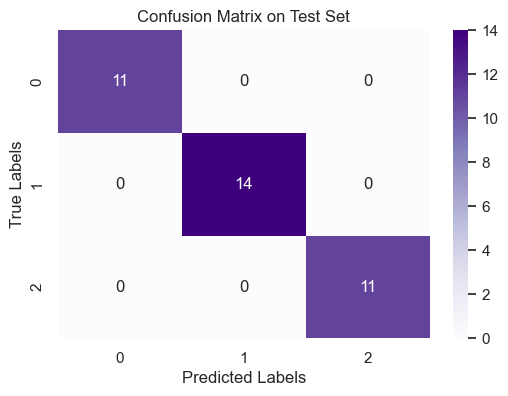

In [221]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='Purples')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()